In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
test=pd.read_csv("E:/analyticv/test.csv")

In [6]:
test.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [7]:
#checking null values
test.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

In [8]:
#Let’s first discover the features that only have two values.
columns = test.columns
binary_cols = []
for col in columns:
    if test[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [9]:
binary_cols

['Gender', 'Transaction_Status', 'Credit_Card']

C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Card', ylabel='count'>

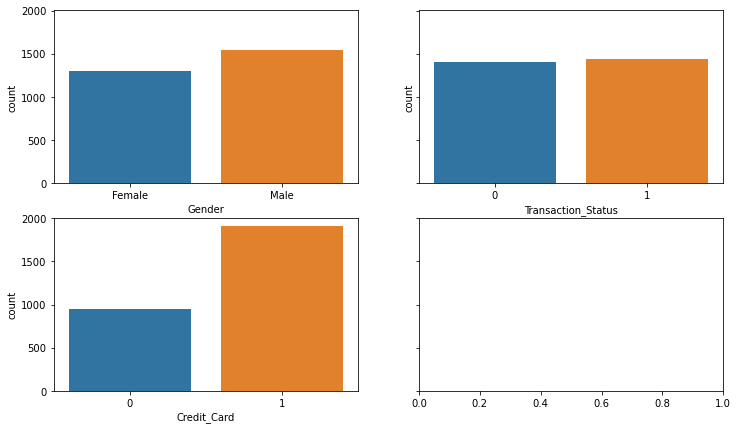

In [10]:
fig, axes = plt.subplots(2,2, figsize=(12, 7), sharey=True)
sns.countplot("Gender", data=test, ax=axes[0,0])
sns.countplot("Transaction_Status", data=test, ax=axes[0,1])
sns.countplot("Credit_Card", data=test, ax=axes[1,0])


In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [12]:
cat_features=['Gender','Credit_Category']
df = pd.get_dummies(test, columns=cat_features, drop_first=True)

In [13]:
df.head()

,ID,Age,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Gender_Male,Credit_Category_Good,Credit_Category_Poor
0,55480787,50,More than 15L,1008636.39,2,1,2,1,0,0,0
1,9aededf2,36,5L - 10L,341460.72,2,0,2,1,1,0,0
2,a5034a09,25,10L - 15L,439460.10,0,0,2,1,0,1,0
3,b3256702,41,Less than 5L,28581.93,0,1,2,1,1,0,1
4,dc28adb5,48,More than 15L,1104540.03,2,1,3+,0,1,1,0


In [14]:
#Handling income columns
cleanup_nums = {"Income":     {"10L - 15L":1, "5L - 10L": 2,"Less than 5L":3,"More than 15L":4}}

In [15]:
test_df =df.replace(cleanup_nums)
test_df.head()

,ID,Age,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Gender_Male,Credit_Category_Good,Credit_Category_Poor
0,55480787,50,4,1008636.39,2,1,2,1,0,0,0
1,9aededf2,36,2,341460.72,2,0,2,1,1,0,0
2,a5034a09,25,1,439460.10,0,0,2,1,0,1,0
3,b3256702,41,3,28581.93,0,1,2,1,1,0,1
4,dc28adb5,48,4,1104540.03,2,1,3+,0,1,1,0


In [16]:
test_df.drop(columns="ID",inplace=True)

In [17]:
test_df.head()

,Age,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Gender_Male,Credit_Category_Good,Credit_Category_Poor
0,50,4,1008636.39,2,1,2,1,0,0,0
1,36,2,341460.72,2,0,2,1,1,0,0
2,25,1,439460.10,0,0,2,1,0,1,0
3,41,3,28581.93,0,1,2,1,1,0,1
4,48,4,1104540.03,2,1,3+,0,1,1,0


In [18]:
test_df.drop(columns="Product_Holdings",inplace=True)
test_df.head()

,Age,Income,Balance,Vintage,Transaction_Status,Credit_Card,Gender_Male,Credit_Category_Good,Credit_Category_Poor
0,50,4,1008636.39,2,1,1,0,0,0
1,36,2,341460.72,2,0,1,1,0,0
2,25,1,439460.10,0,0,1,0,1,0
3,41,3,28581.93,0,1,1,1,0,1
4,48,4,1104540.03,2,1,0,1,1,0


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2851 non-null   int64  
 1   Income                2851 non-null   int64  
 2   Balance               2851 non-null   float64
 3   Vintage               2851 non-null   int64  
 4   Transaction_Status    2851 non-null   int64  
 5   Credit_Card           2851 non-null   int64  
 6   Gender_Male           2851 non-null   uint8  
 7   Credit_Category_Good  2851 non-null   uint8  
 8   Credit_Category_Poor  2851 non-null   uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 142.1 KB


In [20]:
test_df.shape

(2851, 9)

In [21]:
cleaned = test_df.to_csv('test_data.csv',index=False)